In [1]:
include("src/JuliaPhonons.jl")
using JuliaPhonons
using PyPlot

In [2]:
poscar_neutral = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/neutral_POSCAR"))
poscar_negative = JuliaPhonons.read_POSCAR(open("./examples/MAPI_H_centre/negative_POSCAR"))
phonons_neutral = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/neutral_mesh.yaml"),poscar_neutral)
phonons_negative = JuliaPhonons.read_meshyaml(open("./examples/MAPI_H_centre/negative_mesh.yaml"),poscar_negative)


[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N", "N", "N", "N", "N", "N", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "H", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "Pb", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I", "I"]
supercellexpansions ==>Array{Float64,1}[[0.0, 0.0, 0.0]]
[12.5743 0.000853903 0.137524; 0.000141603 12.4741 -0.000835312; 0.138595 -1.31954e-5 12.7567]
Volume: 2000.6757668208738
SubString{String}["C", "N", "H", "Pb", "I"]
POSCAR.natoms: 97
AbstractString["C", "C", "C", "C", "C", "C", "C", "C", "N", "N", "N

(Any[[0.0295856 -0.0357804 0.0132983; 0.0298501 -0.0359258 0.0136408; … ; 0.0962323 -0.117106 0.043828; 0.0962382 -0.116914 0.0456438], [0.016442 0.0275918 0.0364581; 0.0164723 0.0275497 0.0364279; … ; 0.0540134 0.0896803 0.118267; 0.054125 0.089651 0.118462], [0.0347007 0.0175664 -0.0290669; 0.0347265 0.0175828 -0.0292186; … ; 0.113067 0.0569578 -0.094388; 0.113058 0.0569159 -0.0944499], [-0.0223523 -0.0235597 0.000910907; -0.0136128 -0.015645 0.0413655; … ; -0.0274621 0.0505526 -0.0728979; 0.000746735 0.0259993 0.0102076], [-0.00642863 0.0365534 0.0283027; -0.00853109 -0.0144427 -0.0171581; … ; 0.0223064 -0.00867779 -0.0198539; 0.0381864 0.000521586 0.331415], [-0.0229039 -0.00815617 0.0111612; 0.00475894 0.00918921 -0.000793227; … ; 0.0841561 -0.00800914 0.116315; 0.0915316 0.000347784 -0.0207839], [-0.0248397 -0.00162594 0.0609371; 0.00784605 -0.00257302 -0.0129772; … ; 0.00254378 -0.203703 -0.105275; -0.000635289 -0.037887 -0.00375822], [-0.0219231 -0.0181482 0.00988558; -0.015232

In [40]:
poscar_neutral.positions[93,:]

3-element Array{Float64,1}:
 0.224042
 0.984278
 0.988226

In [41]:
poscar_negative.positions[93,:]

3-element Array{Float64,1}:
  0.22951   
 -8.20476e-6
  0.939492  

In [47]:
(poscar_neutral.positions[93,2] -poscar_negative.positions[93,2])

0.9842866553750718

In [48]:
(poscar_negative.positions[93,2]-poscar_neutral.positions[93,2])

-0.9842866553750718

In [60]:
displacement =  poscar_neutral.positions.-poscar_negative.positions 

# check to see if any that shifted more than half a unit cell - in this case it is more likely 
# that moved into a neighbouring cell.
# I have been careful to define this so that if the start and end points are interchanged the displacement stays the same.
for i = 1:size(displacement,2)
    for j = 1:size(displacement,1)
        if (displacement[j,i]) > 0.5
            displacement[j,i] = 1-(displacement[j,i])
            
        end
        if (displacement[j,i]) < -0.5
            displacement[j,i] = -1-(displacement[j,i])
            
        end
    end
end


In [61]:
# scalar projection https://en.wikipedia.org/wiki/Dot_product
projections = []
for eigenvector in phonons_negative[1]   # projecting onto negative as these are stable imaginary in neutral phonon :(
    push!(projections,dot(displacement,eigenvector))
end

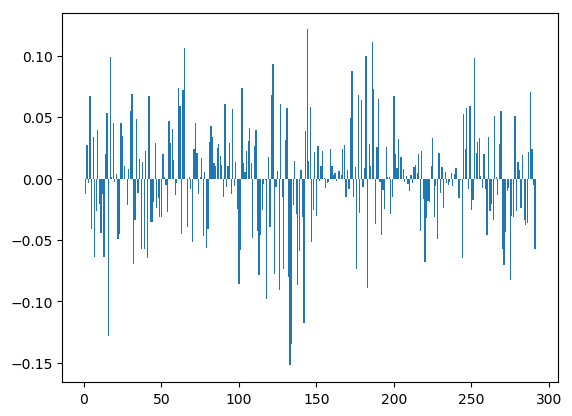

(PyObject <matplotlib.patches.Rectangle object at 0x13679d990>, PyObject <matplotlib.patches.Rectangle object at 0x13679d690>, PyObject <matplotlib.patches.Rectangle object at 0x13679dd10>, PyObject <matplotlib.patches.Rectangle object at 0x1367b7110>, PyObject <matplotlib.patches.Rectangle object at 0x1367b7450>, PyObject <matplotlib.patches.Rectangle object at 0x1367b77d0>, PyObject <matplotlib.patches.Rectangle object at 0x1367b7b50>, PyObject <matplotlib.patches.Rectangle object at 0x1367b7ed0>, PyObject <matplotlib.patches.Rectangle object at 0x1368d8290>, PyObject <matplotlib.patches.Rectangle object at 0x1368d8610>, PyObject <matplotlib.patches.Rectangle object at 0x1368d8990>, PyObject <matplotlib.patches.Rectangle object at 0x1368d8d10>, PyObject <matplotlib.patches.Rectangle object at 0x1368e20d0>, PyObject <matplotlib.patches.Rectangle object at 0x1368e2450>, PyObject <matplotlib.patches.Rectangle object at 0x1368e27d0>, PyObject <matplotlib.patches.Rectangle object at 0x136

In [62]:
PyPlot.bar(1:3*poscar_negative.natoms,projections)

In [63]:
# Not sure if this should be abs or not. Gives the phonon modes which contribute to the distortion.
# could be used to analyse (with three-phonon phase space) how efficiently heat will propagate away
for (i,item) in enumerate(projections)
 if abs(item) > 0.1
        println(i)
    end
    end

16
65
133
134
142
144
186


In [ ]:
## TODO:
## - IPR of these phonon modes
## - animations of these phonon modes

In [64]:
distribution_function = []
for neut_mode in phonons_neutral[1]
    for neg_mode in phonons_negative[1]
    push!(distribution_function,abs(dot(neut_mode,neg_mode)))
    end
end

In [65]:
distribution_function = reshape(distribution_function,3*poscar_negative.natoms,3*poscar_neutral.natoms)

291×291 Array{Any,2}:
 0.00051728   0.603857     0.00805939   …  8.4554e-6    1.28483e-6 
 9.61381e-5   0.684733     0.517114        9.34084e-6   1.77293e-5 
 0.000190213  0.408025     0.855877        2.60376e-6   7.43047e-6 
 0.170903     0.000818206  3.87933e-5      0.000636401  0.0127456  
 0.104791     0.000917567  0.000899        0.00660885   0.000490541
 0.0468291    0.000492515  0.000936953  …  0.00289321   0.00431903 
 0.0940687    0.000815761  8.05079e-5      0.00376132   0.00478921 
 0.0711615    0.00019101   7.55113e-6      0.0053505    0.00826601 
 0.103363     8.56486e-5   9.04069e-5      0.00533725   0.00038815 
 0.0199947    1.56761e-5   0.000218747     0.0029478    0.000583443
 0.00774476   0.000108696  0.000327669  …  0.00215165   0.00204541 
 0.00954395   0.000635849  0.000230106     0.00371233   0.00194311 
 0.000961158  5.9238e-6    0.000117076     0.00172055   0.00458171 
 ⋮                                      ⋱               ⋮          
 0.000232469  3.11262e-6  

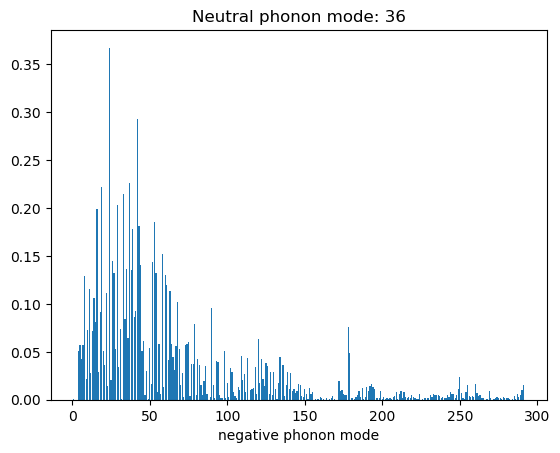

24

In [119]:
## this tells us which modes have shifted up or down in energy

i=36

PyPlot.bar(1:3*poscar_negative.natoms,distribution_function[:,i])
PyPlot.xlabel("negative phonon mode")
PyPlot.title(string("Neutral phonon mode: ",i))

indmax(distribution_function[:,i])

In [89]:
PyPlot.bar3D(1:3*poscar_negative.natoms,1:3*poscar_neutral.natoms,[0]*3*poscar_neutral.natoms,[0.01]*3*poscar_neutral.natomsdistribution_function,)

LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, C_NULL)) <type 'exceptions.TypeError'>
TypeError('bar3d() takes at least 7 arguments (4 given)',)
[39m

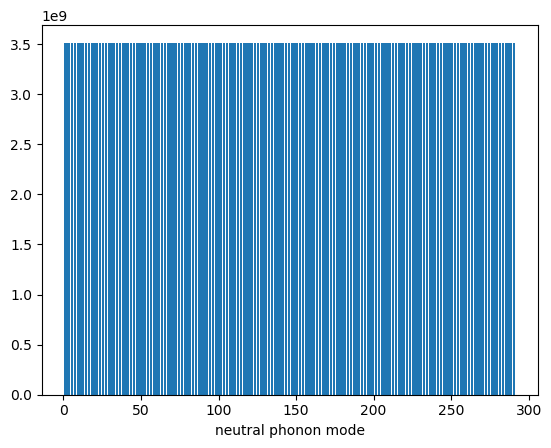

PyObject Text(0.5,24,'neutral phonon mode')

In [80]:
g = []
for i in poscar_neutral.natoms
    push!(g,maximum(1 ./ distribution_function[:,i]))
    end
PyPlot.bar(1:3*poscar_neutral.natoms,g)
PyPlot.xlabel("neutral phonon mode")

In [78]:
maximum(1 ./ distribution_function[:,i])

3.5143125031744847e9